# Classification of XOR data 

In [249]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [250]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 3)
        self.fc2 = nn.Linear(3, 3)
        self.fc3 = nn.Linear(3, 3)
        self.fc4 = nn.Linear(3, 3)
        self.fc5 = nn.Linear(3, 2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return F.log_softmax(x)
        #return F.softmax(x)

#%% plot function
        
def plot_data(X, y, filename):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
    plt.savefig(filename)
    plt.close()
        
def plot_decision_boundary(clf, X, y):
    # Set min and max values and give it some padding
    #x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    #y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    X_out = net(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype = torch.float))
    Z = X_out.data.max(1)[1]
    # Z.shape
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
#     plt.savefig(filename)
#     plt.close()

## Read XOR data

In [251]:
xor_data = pd.read_csv('XOR.csv')

In [252]:
X = xor_data.values[:, 0:2]  # Take only the first two features.     
X = torch.tensor(X, dtype = torch.float)   
y = xor_data.values[:, 2]
y = torch.tensor(y, dtype = torch.long)

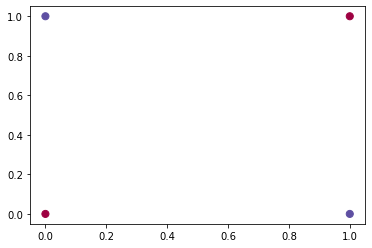

In [253]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 50)

## Part a

In [254]:
torch.manual_seed(1)

#%% train
net = Net()

# create a stochastic gradient descent optimizer
learning_rate = .01
# optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)


# create a loss function
#criterion = nn.CrossEntropyLoss()
criterion = nn.NLLLoss()

nepochs = 20000
data, target = X, y
# run the main training loop
for epoch in range(nepochs):
#    adjust learning rate if desired
#    if epoch % 3000 == 0 and epoch <= 24000:
#        for g in optimizer.param_groups:
#            g['lr'] = g['lr']/2
    optimizer.zero_grad()
    # forward propagate
    net_out = net(data)
    # compute loss
    loss = criterion(net_out, target)
    
    # backpropagate
    loss.backward()
    # update parameters
    optimizer.step()
    # print out report
    
    if epoch % 10 == 0:
        print('Epoch ', epoch, 'Loss ', loss.item())
        net_out = net(data)
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correctidx = pred.eq(target.data) 
        ncorrect = correctidx.sum()
        accuracy = ncorrect.item()/len(data)
        
        if accuracy == 1:
            print('Epoch ', epoch, 'Loss ', loss.item())
            print('Training accuracy is ', accuracy)
            break
        
#%% compute accuracy on training data

net_out = net(data)
pred = net_out.data.max(1)[1]  # get the index of the max log-probability
correctidx = pred.eq(target.data) 
ncorrect = correctidx.sum()
accuracy = ncorrect.item()/len(data)
print('Training accuracy is ', accuracy)

Epoch  0 Loss  0.736347496509552
Epoch  10 Loss  0.6955940127372742
Epoch  20 Loss  0.6918262243270874
Epoch  30 Loss  0.6840749979019165
Epoch  40 Loss  0.6642764806747437
Epoch  50 Loss  0.6278240084648132
Epoch  60 Loss  0.6028811931610107
Epoch  70 Loss  0.5622925162315369
Epoch  80 Loss  0.5042256712913513
Epoch  90 Loss  0.40449467301368713
Epoch  100 Loss  0.22960808873176575
Epoch  100 Loss  0.22960808873176575
Training accuracy is  1.0
Training accuracy is  1.0


<ipython-input-250-2500588065da>:26: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


In [255]:
print(net.fc1.weight)
print(net.fc2.weight)
print(net.fc3.weight)
print(net.fc4.weight)
print(net.fc5.weight)

Parameter containing:
tensor([[ 0.1639, -0.3121],
        [-0.4008,  0.5591],
        [-1.0788,  1.0675]], requires_grad=True)
Parameter containing:
tensor([[-0.1507,  0.3171, -0.6292],
        [ 0.0334,  0.6153, -0.8638],
        [-0.0520,  0.0837, -0.0023]], requires_grad=True)
Parameter containing:
tensor([[-0.4570, -0.4523, -0.2490],
        [-0.5351, -0.6266,  0.3442],
        [ 0.1819, -1.1741,  0.3579]], requires_grad=True)
Parameter containing:
tensor([[-1.1541, -0.7291, -0.7525],
        [ 1.4792,  0.4723,  0.9148],
        [-0.2683,  0.5665, -0.2443]], requires_grad=True)
Parameter containing:
tensor([[ 1.2513, -1.0264,  0.1698],
        [-1.1212,  0.6567, -0.5551]], requires_grad=True)


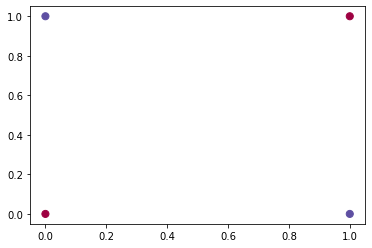

In [256]:
plt.scatter(X[:, 0], X[:, 1], c=pred, cmap=plt.cm.Spectral, s = 50)

<ipython-input-250-2500588065da>:26: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


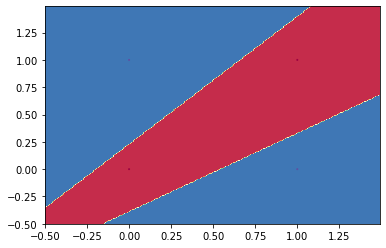

In [257]:
plot_decision_boundary(net, X, y)

## Part b

In [258]:
torch.manual_seed(1)
#%% train
net = Net()

# create a stochastic gradient descent optimizer
learning_rate = .02
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.95)
# optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)


# create a loss function
#criterion = nn.CrossEntropyLoss()
criterion = nn.NLLLoss()

nepochs = 40000
data, target = X, y
# run the main training loop
for epoch in range(nepochs):
#    adjust learning rate if desired
#    if epoch % 3000 == 0 and epoch <= 24000:
#        for g in optimizer.param_groups:
#            g['lr'] = g['lr']/2
    optimizer.zero_grad()
    # forward propagate
    net_out = net(data)
    # compute loss
    loss = criterion(net_out, target)
    
    # backpropagate
    loss.backward()
    # update parameters
    optimizer.step()
    # print out report
    
    if epoch % 10 == 0:
        print('Epoch ', epoch, 'Loss ', loss.item())
        net_out = net(data)
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correctidx = pred.eq(target.data) 
        ncorrect = correctidx.sum()
        accuracy = ncorrect.item()/len(data)
        #if accuracy == 1:
        #    break
        #print('Training accuracy is ', accuracy)
    
    if loss.item() < 0.0001:
        print('Epoch ', epoch, 'Loss ', loss.item())
        print('Training accuracy is ', accuracy)
        break
        
#%% compute accuracy on training data
    
net_out = net(data)
pred = net_out.data.max(1)[1]  # get the index of the max log-probability
correctidx = pred.eq(target.data) 
ncorrect = correctidx.sum()
accuracy = ncorrect.item()/len(data)
print('Training accuracy is ', accuracy)

<ipython-input-250-2500588065da>:26: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Epoch  0 Loss  0.736347496509552
Epoch  10 Loss  0.7030571699142456
Epoch  20 Loss  0.6964033842086792
Epoch  30 Loss  0.7019540667533875
Epoch  40 Loss  0.6940149664878845
Epoch  50 Loss  0.6942743062973022
Epoch  60 Loss  0.6948930025100708
Epoch  70 Loss  0.6932206153869629
Epoch  80 Loss  0.6933157444000244
Epoch  90 Loss  0.6934067010879517
Epoch  100 Loss  0.6930292844772339
Epoch  110 Loss  0.6930426359176636
Epoch  120 Loss  0.6930334568023682
Epoch  130 Loss  0.6929301023483276
Epoch  140 Loss  0.6929093599319458
Epoch  150 Loss  0.6928759217262268
Epoch  160 Loss  0.6928195953369141
Epoch  170 Loss  0.6927758455276489
Epoch  180 Loss  0.692721962928772
Epoch  190 Loss  0.6926549077033997
Epoch  200 Loss  0.6925806999206543
Epoch  210 Loss  0.6924907565116882
Epoch  220 Loss  0.6923809051513672
Epoch  230 Loss  0.6922467947006226
Epoch  240 Loss  0.6920803189277649
Epoch  250 Loss  0.6918716430664062
Epoch  260 Loss  0.6916032433509827
Epoch  270 Loss  0.6912493109703064
Epoch

Epoch  2300 Loss  0.00011047074804082513
Epoch  2310 Loss  0.00010969598952215165
Epoch  2320 Loss  0.00010889140685321763
Epoch  2330 Loss  0.00010811664105858654
Epoch  2340 Loss  0.00010737167031038553
Epoch  2350 Loss  0.00010662669956218451
Epoch  2360 Loss  0.00010591151658445597
Epoch  2370 Loss  0.00010516655311221257
Epoch  2380 Loss  0.00010436198499519378
Epoch  2390 Loss  0.00010370639938628301
Epoch  2400 Loss  0.00010302102600689977
Epoch  2410 Loss  0.00010230585030512884
Epoch  2420 Loss  0.00010162046964978799
Epoch  2430 Loss  0.00010090529394801706
Epoch  2440 Loss  0.00010021991329267621
Epoch  2444 Loss  9.99815238174051e-05
Training accuracy is  1.0
Training accuracy is  1.0


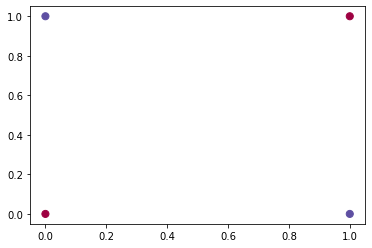

In [259]:
plt.scatter(X[:, 0], X[:, 1], c=pred, cmap=plt.cm.Spectral, s = 50)

<ipython-input-250-2500588065da>:26: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


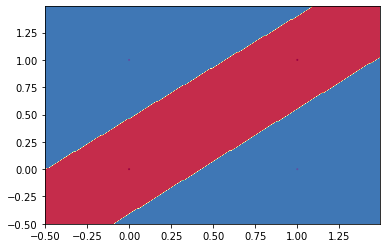

In [260]:
plot_decision_boundary(net, X, y)

In [261]:
print(net.fc1.weight)
print(net.fc2.weight)
print(net.fc3.weight)
print(net.fc4.weight)
print(net.fc5.weight)

Parameter containing:
tensor([[ 0.2384, -0.3121],
        [-0.7682,  0.7971],
        [-1.3349,  1.4042]], requires_grad=True)
Parameter containing:
tensor([[-0.1048,  0.1755, -0.3370],
        [ 0.1118,  1.5274, -1.7594],
        [-0.0520,  0.0837, -0.0023]], requires_grad=True)
Parameter containing:
tensor([[-0.2660, -0.4544, -0.2490],
        [-0.2839, -1.0453,  0.3442],
        [ 0.3242, -1.5960,  0.3579]], requires_grad=True)
Parameter containing:
tensor([[-0.6554, -1.4346, -1.8621],
        [ 0.7625,  0.4104,  0.9134],
        [-0.2683,  0.5665, -0.2443]], requires_grad=True)
Parameter containing:
tensor([[ 2.6531, -1.0153,  0.1698],
        [-2.5231,  0.6456, -0.5551]], requires_grad=True)


## Part c

In [262]:
class Net_smallest(nn.Module):
    
    def __init__(self):
        super(Net_smallest, self).__init__()
        self.fc1 = nn.Linear(2, 5)
        self.fc2 = nn.Linear(5, 2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return F.log_softmax(x)
        #return F.softmax(x)

In [263]:
torch.manual_seed(1)

#%% train
net = Net_smallest()

# create a stochastic gradient descent optimizer
learning_rate = .01
# optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)


# create a loss function
#criterion = nn.CrossEntropyLoss()
criterion = nn.NLLLoss()

nepochs = 40000
data, target = X, y
# run the main training loop 
for epoch in range(nepochs):
    #    adjust learning rate if desired
    if epoch % 3000 == 0 and epoch <= 24000:
        for g in optimizer.param_groups:
            g['lr'] = g['lr']/2
    optimizer.zero_grad()
    # forward propagate
    net_out = net(data)
    # compute loss
    loss = criterion(net_out, target)
    
    # backpropagate
    loss.backward()
    # update parameters
    optimizer.step()
    # print out report
    
    if epoch % 10 == 0:
        print('Epoch ', epoch, 'Loss ', loss.item())
        net_out = net(data)
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correctidx = pred.eq(target.data) 
        ncorrect = correctidx.sum()
        accuracy = ncorrect.item()/len(data)
        if accuracy == 1:
            print('Epoch ', epoch, 'Loss ', loss.item())
            print('Training accuracy is ', accuracy)
            break
        
#%% compute accuracy on training data
net_out = net(data)
pred = net_out.data.max(1)[1]  # get the index of the max log-probability
correctidx = pred.eq(target.data) 
ncorrect = correctidx.sum()
accuracy = ncorrect.item()/len(data)
print('Training accuracy is ', accuracy)

Epoch  0 Loss  0.713304340839386
Epoch  10 Loss  0.6932183504104614
Epoch  20 Loss  0.6886227130889893
Epoch  30 Loss  0.6807949542999268
Epoch  40 Loss  0.6718776226043701
Epoch  50 Loss  0.6607361435890198
Epoch  60 Loss  0.6476262807846069
Epoch  70 Loss  0.632671594619751
Epoch  80 Loss  0.6155209541320801
Epoch  80 Loss  0.6155209541320801
Training accuracy is  1.0
Training accuracy is  1.0


<ipython-input-262-00236a89fdf1>:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


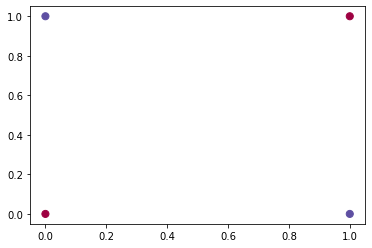

In [264]:
plt.scatter(X[:, 0], X[:, 1], c=pred, cmap=plt.cm.Spectral, s = 50)

<ipython-input-262-00236a89fdf1>:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


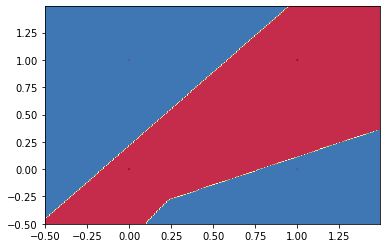

In [266]:
plot_decision_boundary(net, X, y)

In [267]:
print(net.fc1.weight)
print(net.fc2.weight)

Parameter containing:
tensor([[ 0.4105, -0.2601],
        [-0.0891,  0.4562],
        [-0.8403,  0.8193],
        [-0.1455,  0.2682],
        [ 0.0315, -0.0866]], requires_grad=True)
Parameter containing:
tensor([[-0.2940,  0.1987, -0.4466,  0.3153,  0.0813],
        [-0.0634, -0.2411,  0.3807, -0.1173, -0.0854]], requires_grad=True)
